<a href="https://colab.research.google.com/github/meghaadhapure/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>



---


---





# **Describe Data**



---

---








When we think about hotel booking we definitely concern about some factors such as location,pricing,security,service,etc...The main few things I will usually consider include prices per night, distance of hotel from attractions and restaurants, availability of free breakfasts, scenery in hotel room, cleanliness of hotel room and of course, availability of free wifi.

This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has from the data.

From it, we can understand the customer’s’ behavior and it might help us make better decisions. The process of our analysis will be by the following steps:

Define our Business question


Understanding the Datasets

Data preparation and wrangling

Analyze the data

Model the data and conclusion.



---



---


# **Importing data**

---


---




## First Import necessary packages and import the dataset

In [ ]:
#importing  neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import data
file_path= '/content/drive/MyDrive/Hotel Bookings.csv'
hotel_booking_df = pd.read_csv(file_path)



---



---


# **Review the data**


---

---





## Some basic data cleaning is performed on this dataset. Let us first know our data.

In [ ]:
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


## Now, let’s extract some information like the number of non-null values in every column and their datatypes

In [ ]:
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
list(hotel_booking_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
hotel_booking_df.shape

(119390, 32)

In [ ]:
hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## The dimension of our dataset is 119390 rows and 32 columns.



---



---


# **DATA CLEANING**


---

---





# Data cleaning is the process that removes data that does not belong in your data set. Data cleaning is the process of fixing or removing incorrect,corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

## Now lets check how many cells are missing from our dataset.

In [ ]:
# we need to find missing values in our dataset
print("        | missing values | \n" )
hotel_booking_df.isnull().sum()

        | missing values | 



hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## As we can see, In our dataset children, country, agent and company series contains null values. 

## so we need to clean our data and treat these null values.



---



---


# **Handling Null Values**



---



---



## Filling the missing values of columns

### **1.COUNTRY SERIES**

### country column contains country codes representing different countries. I will  replace it with the mode value. The mode value is the value that appears more than any other value.


In [ ]:
hotel_booking_df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
mode_value = hotel_booking_df['country'].mode()[0]

In [ ]:
print(mode_value)

PRT


In [ ]:
#replace country values with mode value (index=0)
hotel_booking_df['country'].fillna((mode_value),inplace=True)

## Above we treat country series null values,

## Lets check again 

In [ ]:
#check whether country contain null or not null values
hotel_booking_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## so now there is no null values,NaN in Country series .

### **2.CHILDREN SERIES**

### Children column contains the count of children, so we will replace all the missing values with the median value.

In [ ]:
hotel_booking_df.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
median_value = hotel_booking_df['children'].median()

In [ ]:
print(median_value)

0.0


In [ ]:
#replace children values with median values
hotel_booking_df['children'].fillna((median_value),inplace=True)

### **3.AGENT SERIES**

### In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.


In [ ]:
hotel_booking_df.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
#replace agent with zeros
hotel_booking_df['agent'].fillna((0),inplace=True)

### **4.COMPANY SERIES**

In [ ]:
hotel_booking_df.company.value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [ ]:
#replace company with zeros
hotel_booking_df['company'].fillna((0),inplace=True)

In [ ]:
#checking all dataset 
hotel_booking_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## As we can see above, now our dataset is not contain any null values.

## **Finding Unique values of our dataset**

In [ ]:
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
hotel_booking_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
hotel_booking_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
hotel_booking_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
hotel_booking_df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)



---



---



# **Exploratory Analysis and Visualization**

---



---



## **A.** ***Comparison between Hotel type:***



### 1.  Resort Hotel
### 2.  City Hotel







In [ ]:
#Separating the data on the basis of hotels
resort_data = hotel_booking_df[hotel_booking_df['hotel'] == 'Resort Hotel']
city_data = hotel_booking_df[hotel_booking_df['hotel'] == 'City Hotel']

In [ ]:
resort_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
city_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,0.0,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,0.0,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,0.0,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,0.0,0,Transient,76.5,0,1,Canceled,2015-04-02


In [ ]:
hotel_type_wise = hotel_booking_df['hotel'].value_counts()
hotel_type_wise 

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

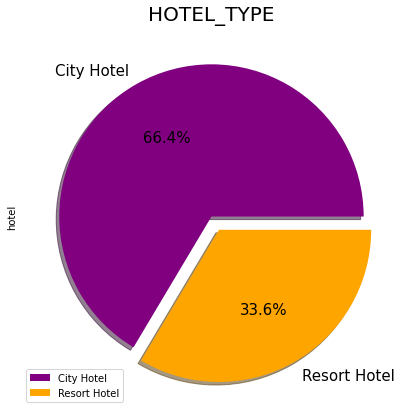

In [ ]:
hotel_type_wise.plot(kind='pie',colors=['purple','orange'],subplots=True,shadow=True,explode =(0, 0.1),figsize=(7,7), autopct='%1.1f%%',fontsize=15)
plt.title('HOTEL_TYPE',fontsize=20)
labels=['City Hotel','Resort Hotel']
plt.legend(labels)
plt.show()

## From above analysis, we see that people preferred city hotel more than resort hotel.
## Approximately double number of population booked city hotel (66.4%) over resort hotel (33.6%).



---



## ***B. Analysis of booking for each year***

## In the given dataset we have to compare booking in each year which is 2015, 2016 and 2017 according to hotel type.

In [ ]:
#finding value count of arrival_date_year
arrival_year_wise= hotel_booking_df.groupby(['hotel'])['arrival_date_year'].value_counts()
arrival_year_wise


hotel         arrival_date_year
City Hotel    2016                 38140
              2017                 27508
              2015                 13682
Resort Hotel  2016                 18567
              2017                 13179
              2015                  8314
Name: arrival_date_year, dtype: int64

Text(0, 0.5, 'Count')

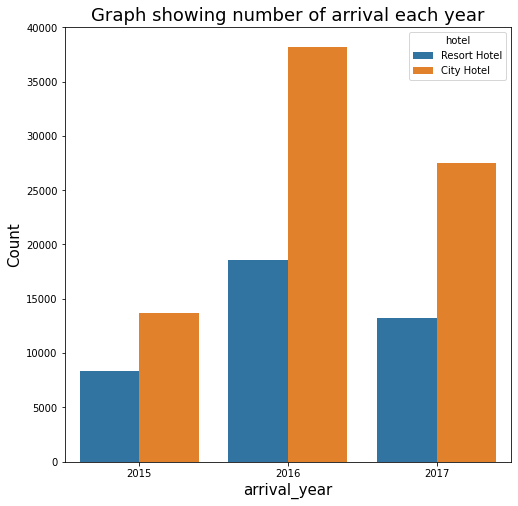

In [ ]:
arrival_year_data = ['hotel', 'arrival_date_year']
arrival_year_period =hotel_booking_df[arrival_year_data]
plt.figure(figsize=(8,8))
sns.countplot(data = arrival_year_period, x = 'arrival_date_year', hue = 'hotel').set_title('Graph showing number of arrival each year',fontsize=18)
plt.xlabel('arrival_year',fontsize = 15)
plt.ylabel('Count',fontsize = 15)

## In 2016,  booking in both city hotel and resort hotel is higher as compared to other years which is 2015 and 2017.
## More than double bookings were made in 2016, compared to the previous year(2015). But the bookings decreased by almost 15% the next year (2017).



---



## ***C. Analysis of booking for every month***

In [ ]:
arrival_month_wise= hotel_booking_df.groupby(['hotel'])['arrival_date_month'].value_counts()
arrival_month_wise

hotel         arrival_date_month
City Hotel    August                8983
              May                   8232
              July                  8088
              June                  7894
              October               7605
              April                 7480
              September             7400
              March                 6458
              February              4965
              November              4357
              December              4132
              January               3736
Resort Hotel  August                4894
              July                  4573
              April                 3609
              May                   3559
              October               3555
              March                 3336
              September             3108
              February              3103
              June                  3045
              December              2648
              November              2437
              January   

Text(0, 0.5, 'Count')

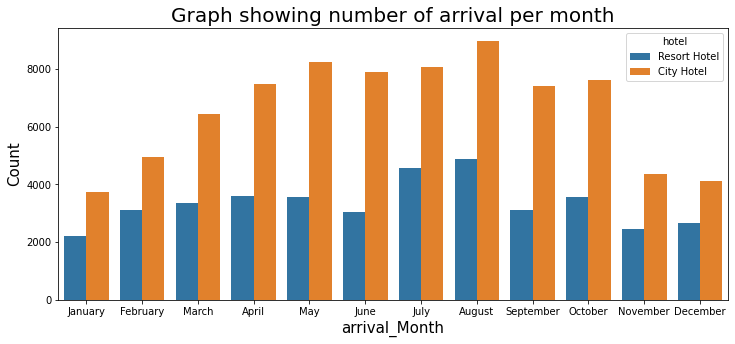

In [ ]:
arrival_month_data = ['hotel', 'arrival_date_month']
arrival_month_period =hotel_booking_df[arrival_month_data]
plt.figure(figsize=(12,5))

sns.countplot(data = arrival_month_period, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('arrival_Month',fontsize = 15)
plt.ylabel('Count',fontsize = 15)

## The number of bookings in the month of August is maximum and in the month of January is minimum for both the hotels.



---



## ***D. Analysis of price change per month per hotel.***

## 1.Month wise price change for resort hotel.

In [ ]:
## Select only resort Hotel
resort_hotel_adr=resort_data.groupby('arrival_date_month')['adr'].mean().reset_index()
resort_hotel_adr

,arrival_date_month,adr
0,April,77.849496
1,August,186.790574
2,December,68.984230
3,February,55.171930
4,January,49.461883
5,July,155.181299
6,June,110.444749
7,March,57.520147
8,May,78.758134
9,November,48.273993


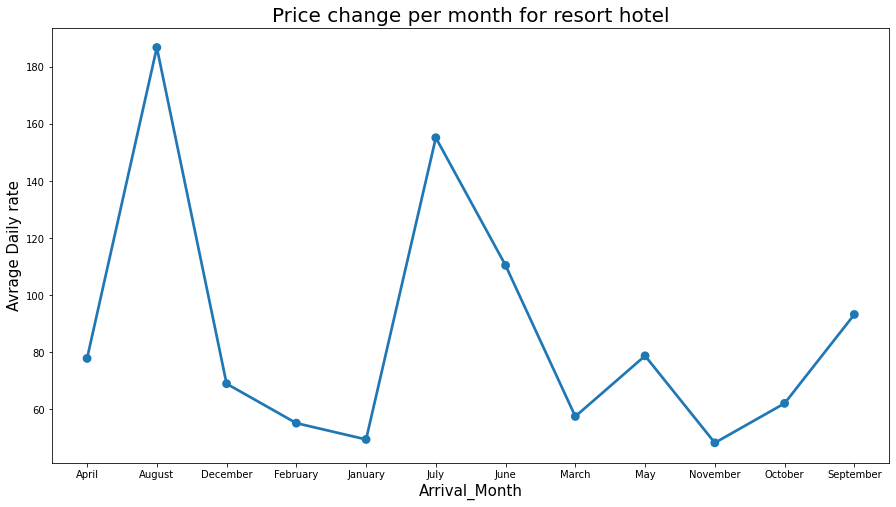

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(x='arrival_date_month',y='adr',data=resort_hotel_adr)
plt.title("Price change per month for resort hotel",fontsize = 20)
plt.xlabel('Arrival_Month', fontsize = 15)
plt.ylabel('Avrage Daily rate', fontsize = 15)
plt.show()

## According to the above plot, Price of resort hotel are much higher in August month and lowest in the start (January, February , March) and end of the year (October, November, December).

## 2.Month wise price change for city hotel.

In [ ]:
## Select only City Hotel
city_hotel_adr=city_data.groupby('arrival_date_month')['adr'].mean().reset_index()
city_hotel_adr

,arrival_date_month,adr
0,April,111.251838
1,August,114.680455
2,December,88.826307
3,February,85.088278
4,January,82.628986
5,July,110.734292
6,June,119.074341
7,March,92.643116
8,May,121.638560
9,November,88.069601


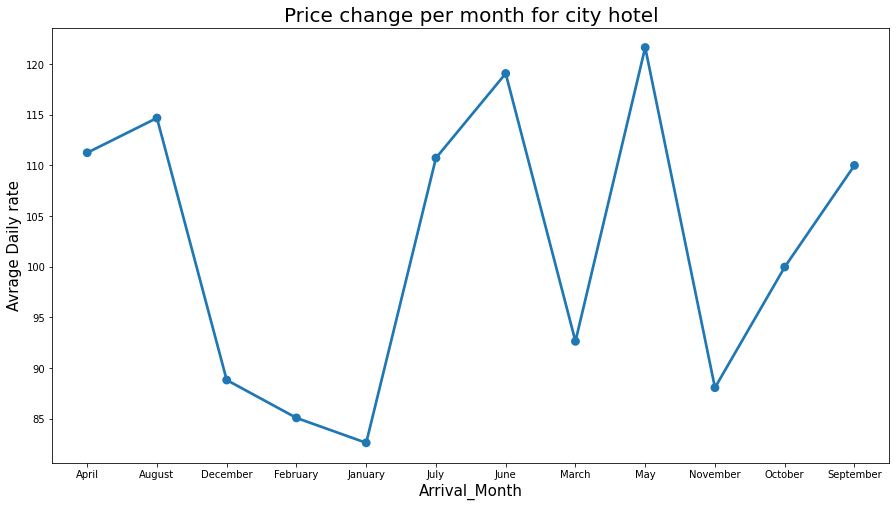

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(x='arrival_date_month',y='adr',data=city_hotel_adr)
plt.title("Price change per month for city hotel",fontsize =20)
plt.xlabel('Arrival_Month', fontsize = 15)
plt.ylabel('Avrage Daily rate', fontsize = 15)
plt.show()

## Prices of city hotel are much higher in May month and lower in January month.

## ***E. Analysis of Reservation status***

### reservation_status


*   Canceled – booking was canceled.
*  Check-Out – customer has checked in but already departed.

*   No-Show – customer did not check-in.












In [ ]:
reservation_data = hotel_booking_df.groupby(['hotel'])['reservation_status'].value_counts()
reservation_data

hotel         reservation_status
City Hotel    Check-Out             46228
              Canceled              32186
              No-Show                 916
Resort Hotel  Check-Out             28938
              Canceled              10831
              No-Show                 291
Name: reservation_status, dtype: int64

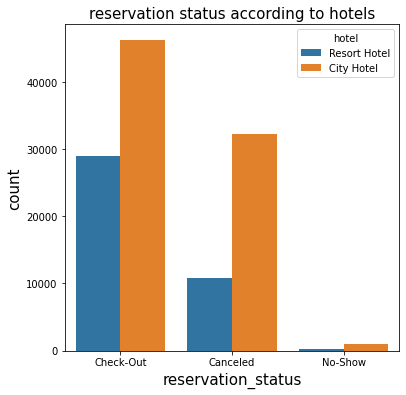

In [ ]:
#Let's check reservation status of their booking in the respective hotels
plt.figure(figsize=(6,6))
sns.countplot(x="reservation_status", hue="hotel", data= hotel_booking_df)
plt.title("reservation status according to hotels",fontsize =15)
plt.xlabel('reservation_status', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()


## From the above data, check-out is more than cancellation of booking in both the city hotel and the resort hotel.

In [ ]:
cancelled_df =  hotel_booking_df.groupby(['hotel'])['is_canceled'].value_counts()
cancelled_df

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64